# Deep Neural Network for Binary Classification

## N layer with N hidden units are designed with following options

  **1 ** ) **Hyper Paremters Initialization**
                 - zero Initialization
                 - random Initialization
                 - HE Initialization
  **2 ** ) **Forward Propogation**
                 - Out of L layers first L-1 layers use Relu activation function
                 - Lth layer uses sigmoid activation function
  **3 ** ) **Regulariztion**
                 - Dropout
                 - lambda with L2 regularization
  **4 ** )  **Cost**
                 - L2 Regularization
  **5 ** ) **Optimization**
                 - Gradient Descent Algorithm
                 

In [1]:
import time
import numpy as np
import h5py
import pandas as pd
import matplotlib.pyplot as plt
import scipy
from PIL import Image
from scipy import ndimage
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

data = pd.read_table("C:/Users/gokul/Documents/Projects/Neural Networks/data_banknote_authentication.txt", sep=',', header=None)
Xpd = data[[0,1,2,3]]
ypd = data[4]
#X_train, X_test, y_train, y_test = train_test_split(Xpd, ypd, test_size=0.10, random_state=324)
X_el = np.matrix(Xpd)
Y_el = np.matrix(ypd)
X, X_test, Y, y_test = train_test_split(X_el, Y_el.T, test_size=0.10, random_state=324)
X = X.T
Y.shape #(m,1)

(1234, 1)

# Hyper Parameter (W, b) Initialization

**HE Initiallization ** : This function is similar to the previous `initialize_parameters_random(...)`. The only difference is that instead of multiplying `np.random.randn(..,..)` by 10, you will multiply it by $\sqrt{\frac{2}{\text{dimension of the previous layer}}}$, which is what He initialization recommends for layers with a ReLU activation. 

In [2]:
def initialize_parameters_deep(layers_dims,initialization="he"):
    """
    Arguments:
    layer_dims -- python array (list) containing the dimensions of each layer in our network
    
    Returns:
    parameters -- python dictionary containing your parameters "W1", "b1", ..., "WL", "bL":
                    Wl -- weight matrix of shape (layer_dims[l], layer_dims[l-1])
                    bl -- bias vector of shape (layer_dims[l], 1)
    """
    
    np.random.seed(3)
    parameters = {}
    L = len(layers_dims)            # number of layers in the network
    

    for l in range(1, L):
        
        if initialization == "zeros":
            parameters['W' + str(l)] = np.zeros((layers_dims[l], layers_dims[l-1]))
            parameters['b' + str(l)] = np.zeros((layers_dims[l],1))
        elif initialization == "random":
            parameters['W' + str(l)] = np.random.randn(layers_dims[l],layers_dims[l-1]) * 0.01
            parameters['b' + str(l)] = np.zeros((layers_dims[l],1))
        elif initialization == "he":
            parameters['W' + str(l)] = np.random.randn(layers_dims[l],layers_dims[l-1]) * np.sqrt(2/layers_dims[l-1])
            parameters['b' + str(l)] = np.zeros((layers_dims[l],1))
            #print(parameters['W' + str(l)].shape)
            #print(parameters['b' + str(l)].shape)
        
        assert(parameters['W' + str(l)].shape == (layers_dims[l], layers_dims[l-1]))
        assert(parameters['b' + str(l)].shape == (layers_dims[l], 1))

        
    return parameters

# Foward Propogation Algorithm starts here

.

In [3]:
def sigmoid(z):
    """
    Compute the sigmoid of z

    Arguments:
    z -- A scalar or numpy array of any size.

    Return:
    s -- sigmoid(z)
    """
    s = 1/(1+np.exp(-z))
    return s,z

def relu(z):
    s = (abs(z) + z) / 2
    return s,z

In [4]:
def linear_forward(A, W, b):
    """
    Implement the linear part of a layer's forward propagation.

    Arguments:
    A -- activations from previous layer (or input data): (size of previous layer, number of examples)
    W -- weights matrix: numpy array of shape (size of current layer, size of previous layer)
    b -- bias vector, numpy array of shape (size of the current layer, 1)

    Returns:
    Z -- the input of the activation function, also called pre-activation parameter 
    cache -- a python dictionary containing "A", "W" and "b" ; stored for computing the backward pass efficiently
    """
    
    Z = np.dot(W,A) + b
    assert(Z.shape == (W.shape[0], A.shape[1]))
    cache = (A, W, b)
    
    return Z, cache

In [5]:
def linear_activation_forward(A_prev, W, b, activation):
    """
    Implement the forward propagation for the LINEAR->ACTIVATION layer

    Arguments:
    A_prev -- activations from previous layer (or input data): (size of previous layer, number of examples)
    W -- weights matrix: numpy array of shape (size of current layer, size of previous layer)
    b -- bias vector, numpy array of shape (size of the current layer, 1)
    activation -- the activation to be used in this layer, stored as a text string: "sigmoid" or "relu"

    Returns:
    A -- the output of the activation function, also called the post-activation value 
    cache -- a python dictionary containing "linear_cache" and "activation_cache";
             stored for computing the backward pass efficiently
    """
    
    if activation == "sigmoid":
        # Inputs: "A_prev, W, b". Outputs: "A, activation_cache".
        Z, linear_cache = linear_forward(A_prev,W,b)
        #Z = np.dot(W,A_prev) + b
        A, activation_cache = sigmoid(Z)
        #print("sigmoid")
    
    elif activation == "relu":
        # Inputs: "A_prev, W, b". Outputs: "A, activation_cache".
        Z, linear_cache = linear_forward(A_prev,W,b)
        #Z = np.dot(W,A_prev) + b
        A, activation_cache = relu(Z)
        #print("relu")
    
    assert (A.shape == (W.shape[0], A_prev.shape[1]))
    cache = (linear_cache, activation_cache)

    return A, cache

In [6]:
def L_model_forward(X, parameters,keep_prob):
    """
    Implement forward propagation for the [LINEAR->RELU]*(L-1)->LINEAR->SIGMOID computation
    
    Arguments:
    X -- data, numpy array of shape (input size, number of examples)
    parameters -- output of initialize_parameters_deep()
    
    Returns:
    AL -- last post-activation value
    caches -- list of caches containing:
                every cache of linear_activation_forward() (there are L-1 of them, indexed from 0 to L-1)
    """

    caches = []
    A = X
    L = len(parameters) // 2                  # number of layers in the neural network
    # Implement [LINEAR -> RELU]*(L-1). Add "cache" to the "caches" list.
    for l in range(1, L):
        A_prev = A 
        #print(A_prev.shape)
        A, cache = linear_activation_forward(A_prev, parameters['W' + str(l)] ,parameters['b' + str(l)], "relu")
        D = np.random.rand(A.shape[0],A.shape[1])
        D = D < keep_prob
        #print(A.shape[0])
        A = np.multiply(A,D )
        A = A/keep_prob
        cache = cache + (D,)
        caches.append(cache)
    
    # Implement LINEAR -> SIGMOID. Add "cache" to the "caches" list.
    AL, cache = linear_activation_forward(A,parameters['W' + str(L)] ,parameters['b' + str(L)],"sigmoid" )
    caches.append(cache)
    assert(AL.shape == (1,X.shape[1]))
            
    return AL, caches

In [27]:
parameters = initialize_parameters_deep([4,5,2,1], "he")
print(parameters["W1"].shape)
AL, caches = L_model_forward(X, parameters,1)
AL.shape
#caches[0]

(5, 4)


(1, 1234)

# Cost Computation 
## L2 Regularization

The standard way to avoid overfitting is called **L2 regularization**. It consists of appropriately modifying your cost function, from:
$$J = -\frac{1}{m} \sum\limits_{i = 1}^{m} \large{(}\small  y^{(i)}\log\left(a^{[L](i)}\right) + (1-y^{(i)})\log\left(1- a^{[L](i)}\right) \large{)} \tag{1}$$
To:
$$J_{regularized} = \small \underbrace{-\frac{1}{m} \sum\limits_{i = 1}^{m} \large{(}\small y^{(i)}\log\left(a^{[L](i)}\right) + (1-y^{(i)})\log\left(1- a^{[L](i)}\right) \large{)} }_\text{cross-entropy cost} + \underbrace{\frac{1}{m} \frac{\lambda}{2} \sum\limits_l\sum\limits_k\sum\limits_j W_{k,j}^{[l]2} }_\text{L2 regularization cost} \tag{2}$$


In [9]:
def compute_cost(AL, Y,parameters,lambd,regularized):
    """
    Implement the cost function defined by equation (7).

    Arguments:
    AL -- probability vector corresponding to your label predictions, shape (1, number of examples)
    Y -- true "label" vector (for example: containing 0 if non-cat, 1 if cat), shape (1, number of examples)
    parameters -- python dictionary containing parameters of the model

    Returns:
    cost --  value of the regularized loss function (formula (2))
    """
    
    m = Y.shape[1]
    cross_entropy_cost = -(1/m)* np.sum(np.multiply(np.log(AL),Y) + np.multiply((1-Y),np.log(1-AL)))
    loop_len = len(parameters)//2
    #print(AL.shape)
    
    if regularized == True:
        temp = 0
        for i in range(1,loop_len+1):
            temp += np.sum(np.square(parameters['W' + str(i)]))
        L2_regularization_cost = (1/m) * (lambd/2) * temp
        #print("L2_regularization_cost {}".format(L2_regularization_cost))
        #L2_regularization_cost = (1/m) * (lambd/2) * (np.sum(np.square(parameters["W1"])) + np.sum(np.square(parameters["W2"])) + np.sum(np.square(parameters["W3"])))
        #print(L2_regularization_cost)
        cost = cross_entropy_cost + L2_regularization_cost
    else:
        cost = cross_entropy_cost
        
    #print("Cross Entropy cost {}".format(cross_entropy_cost))
    
    
    cost = np.squeeze(cost)      # To make sure your cost's shape is what we expect (e.g. this turns [[17]] into 17).
    assert(cost.shape == ())
    
    return cost

In [10]:
cost = compute_cost(AL, Y.T,parameters,0.01,False)
print(cost)
kldjf = 4
if kldjf is None:
    print("he")
elif kldjf is not(None):
    print("kljdf")

0.670889593999
kljdf


## Back Propogation Alogorithm starts here

.

In [11]:
def linear_backward(dZ, cache,D,lambd,keep_prob,val):
    """
    Implement the linear portion of backward propagation for a single layer (layer l)

    Arguments:
    dZ -- Gradient of the cost with respect to the linear output (of current layer l)
    cache -- tuple of values (A_prev, W, b) coming from the forward propagation in the current layer

    Returns:
    dA_prev -- Gradient of the cost with respect to the activation (of the previous layer l-1), same shape as A_prev
    dW -- Gradient of the cost with respect to W (current layer l), same shape as W
    db -- Gradient of the cost with respect to b (current layer l), same shape as b
    """
    #linear_cache, activation_cache,D = cache

    linear_cache, activation_cache, dummy= cache
    A_prev, W, b = linear_cache
    m = A_prev.shape[1]
    #print("W shape: {}".format(W.shape))
    #print("DZ shape: {}".format(dZ.shape))
    #print(dZ.shape)
    dA_prev = np.dot(W.T, dZ)
    #print("DA_prev shape: {}".format(dA_prev.shape))
    #print("D shape: {}".format(D.shape))
    if val ==0:
        dZ_prev = None
    else:
        dA_prev = np.multiply(dA_prev,D )
        dA_prev = dA_prev/keep_prob
        dZ_prev = np.multiply(dA_prev, np.int64(A_prev > 0))
    
    dW = (1./m) * np.dot(dZ,A_prev.T) + ((lambd/m) * W)
    db = (1./m) * np.sum(dZ,axis=1)
    assert (dA_prev.shape == A_prev.shape)
    assert (dW.shape == W.shape)
    assert (db.shape == b.shape)
    return dZ_prev, dA_prev, dW, db

In [12]:
def L_model_backward(AL, Y, caches, lambd,keep_prob):
    """
    Implement the backward propagation for the [LINEAR->RELU] * (L-1) -> LINEAR -> SIGMOID group
    
    Arguments:
    AL -- probability vector, output of the forward propagation (L_model_forward())
    Y -- true "label" vector (containing 0 if non-cat, 1 if cat)
    caches -- list of caches containing:
                every cache of linear_activation_forward() with "relu" (it's caches[l], for l in range(L-1) i.e l = 0...L-2)
                the cache of linear_activation_forward() with "sigmoid" (it's caches[L-1])
    
    Returns:
    grads -- A dictionary with the gradients
             grads["dA" + str(l)] = ... 
             grads["dW" + str(l)] = ...
             grads["db" + str(l)] = ... 
    """
    grads = {}
    L = len(caches) # the number of layers
    #print(L)
    m = AL.shape[1]
    Y = Y.reshape(AL.shape) # after this line, Y is the same shape as AL
    
    # Initializing the backpropagation and dZL for last layer 
    dAL = - (np.divide(Y, AL) - np.divide(1 - Y, 1 - AL))
    #print("AL shape {}".format(AL.shape))
    linear_cache, activation_cache = caches[L-1]
    A_prev2, W3, b3 = linear_cache
    #print("A_prev2 {}".format(A_prev2.shape))
    
    dZ_prev3 = AL - Y
    #print("dZ_prev {}".format(dZ_prev3.shape))
    grads["dW" + str(L)] = 1./m * np.dot(dZ_prev3, A_prev2.T)+((lambd/m) * W3)
    grads["db" + str(L)] = 1./m * np.sum(dZ_prev3, axis=1)
    #print("DWL shape: {}".format( grads["dW" + str(L)].shape))
    #print("DbL Shape: {}".format(grads["db" + str(L)].shape))
    
    dA_prev2 = np.dot(W3.T, dZ_prev3)
    #print("dA_prev2 shape: {}".format(dA_prev2.shape))
    linear_cache, activation_cache,D = caches[L-2]
    #A_prev, W, b = linear_cache
    #print("D2 shape {}".format(D.shape))
    #print(dA_prev.shape)
    dA_prev2 = np.multiply(D,dA_prev2)
    dA_prev2 = dA_prev2/keep_prob
    #print("After dA_prev2 shape: {}".format(dA_prev2.shape))
    dZ = np.multiply(dA_prev2, np.int64(A_prev2 > 0))
    #print("DZ shape last: {}".format(dZ.shape))
    x, y,D_prev = caches[L-3]
    
    #print(dZ_prev.shape)
    #grads["dA" + str(L)] = dAL
    
    # Loop from l=L-2 to l=0
    for l in reversed(range(L)):
        # lth layer: (RELU -> LINEAR) gradients.
        # Inputs: "grads["dA" + str(l + 1)], current_cache". Outputs: "grads["dA" + str(l)] , grads["dW" + str(l + 1)] , grads["db" + str(l + 1)] 
        current_cache = caches[l-1]
        #print(l)
        D = D_prev
        #print(l-1)
        val = l - 1
        dZ_prev, dA_prev_temp, dW_temp, db_temp = linear_backward(dZ, current_cache, D,lambd,keep_prob, val)
        if val ==0:
            pass
        else:
            x, y, D_prev = caches[l-2]
        dZ = dZ_prev
        #grads["dA" + str(l)] = dA_prev_temp
        grads["dW" + str(l)] = dW_temp
        grads["db" + str(l)] = db_temp
        if val ==0:
            break
    
    return grads

# Updating Hyper Parameters Based on Gradient Descent

.

In [15]:
def update_parameters(parameters, grads, learning_rate):
    """
    Update parameters using gradient descent
    
    Arguments:
    parameters -- python dictionary containing your parameters 
    grads -- python dictionary containing your gradients, output of L_model_backward
    
    Returns:
    parameters -- python dictionary containing your updated parameters 
                  parameters["W" + str(l)] = ... 
                  parameters["b" + str(l)] = ...
    """
    
    L = len(parameters) // 2 # number of layers in the neural network

    # Update rule for each parameter. Use a for loop.
    ### START CODE HERE ### (≈ 3 lines of code)
    for l in range(L):
        parameters["W" + str(l+1)] = parameters["W" + str(l+1)] - learning_rate * grads["dW" + str(l + 1)]
        parameters["b" + str(l+1)] = parameters["b" + str(l+1)] - learning_rate * grads["db" + str(l + 1)]
    ### END CODE HERE ###
    return parameters


# Model controlling Function

.

In [16]:
def model(X, Y, learning_rate = 0.3, num_iterations = 10000, print_cost = True, lambd = 0.01, keep_prob = 1):
    
    """
    Implements a three-layer neural network: LINEAR->RELU->LINEAR->RELU->LINEAR->SIGMOID.
    
    Arguments:
    X -- input data, of shape (input size, number of examples)
    Y -- true "label" vector (1 for blue dot / 0 for red dot), of shape (output size, number of examples)
    learning_rate -- learning rate of the optimization
    num_iterations -- number of iterations of the optimization loop
    print_cost -- If True, print the cost every 10000 iterations
    lambd -- regularization hyperparameter, scalar
    keep_prob - probability of keeping a neuron active during drop-out, scalar.
    
    Returns:
    parameters -- parameters learned by the model. They can then be used to predict.
    """
        
    grads = {}
    costs = []                            # to keep track of the cost
    m = X.shape[1]                        # number of examples
    layers_dims = [X.shape[0],5,3, 1]
    #print(layers_dims)
    # Initialize parameters dictionary.
    parameters = initialize_parameters_deep(layers_dims,"random")
    #print(parameters.keys())

    # Loop (gradient descent)
    for i in range(0, num_iterations):
        AL, cache = L_model_forward(X, parameters,keep_prob)
        cost = compute_cost(AL, Y.T,parameters,lambd,True)
        grads = L_model_backward(AL, Y, cache, lambd,keep_prob)
        #print(grads.keys())
        
        parameters = update_parameters(parameters, grads, learning_rate)
        
        if print_cost and i % 1000 == 0:
            print("Cost after iteration {}: {}".format(i, cost))
        if print_cost and i % 1000 == 0:
            costs.append(cost)
    
    # plot the cost
    plt.plot(costs)
    plt.ylabel('cost')
    plt.xlabel('iterations (x1,000)')
    plt.title("Learning rate =" + str(learning_rate))
    plt.show()
    
    return parameters,grads

Cost after iteration 0: 0.6931475034011116
Cost after iteration 1000: 0.006110831942679048
Cost after iteration 2000: 0.0024430686962044817
Cost after iteration 3000: 0.0015414471554590387
Cost after iteration 4000: 0.0011370673124825952
Cost after iteration 5000: 0.0009093745916969098
Cost after iteration 6000: 0.000763799678626909
Cost after iteration 7000: 0.0006629272015578252
Cost after iteration 8000: 0.0005890747442191828
Cost after iteration 9000: 0.0005328199407976464


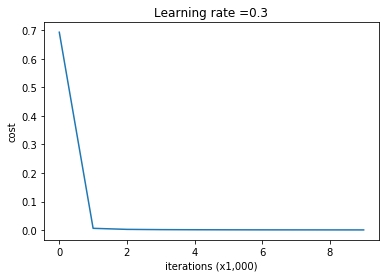

On the train set:
1.0
On the test set:
1.0


In [26]:
keep_prob=0.2
learning_rate = 0.5
parameters,grads = model(X, Y)
print ("On the train set:")
AL, xx = L_model_forward(X, parameters,1)
predicted = np.matrix(np.zeros(AL.shape[1]))
predicted[AL>0.5] = 1
Accuracy = accuracy_score(y_true=Y.T,y_pred = predicted,normalize=True)
print(Accuracy)
print ("On the test set:")
AT, xx = L_model_forward(X_test.T, parameters,1)
Tpredicted = np.matrix(np.zeros(AT.shape[1]))
Tpredicted[AT>0.5] = 1
TAccuracy = accuracy_score(y_true=y_test.T,y_pred = Tpredicted,normalize=True)
print(TAccuracy)

In [8]:
import math
import numpy as np
import h5py
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.python.framework import ops
#from tf_utils import load_dataset, random_mini_batches, convert_to_one_hot, predict

%matplotlib inline
np.random.seed(1)

In [1]:
def create_placeholders(n_x, n_y):
    """
    Creates the placeholders for the tensorflow session.
    
    Arguments:
    n_x -- scalar, size of an image vector (num_px * num_px = 64 * 64 * 3 = 12288)
    n_y -- scalar, number of classes (from 0 to 5, so -> 6)
    
    Returns:
    X -- placeholder for the data input, of shape [n_x, None] and dtype "float"
    Y -- placeholder for the input labels, of shape [n_y, None] and dtype "float"
    
    Tips:
    - You will use None because it let's us be flexible on the number of examples you will for the placeholders.
      In fact, the number of examples during test/train is different.
    """

    ### START CODE HERE ### (approx. 2 lines)
    X = tf.placeholder(shape=[n_x,None], dtype= "float", name = "X")
    Y = tf.placeholder(shape=[n_y, None], dtype = "float", name = "Y")
    ### END CODE HERE ###
    
    return X, Y

In [2]:
def initialize_parameters():
    """
    Initializes parameters to build a neural network with tensorflow. The shapes are:
                        W1 : [25, 12288]
                        b1 : [25, 1]
                        W2 : [12, 25]
                        b2 : [12, 1]
                        W3 : [6, 12]
                        b3 : [6, 1]
    
    Returns:
    parameters -- a dictionary of tensors containing W1, b1, W2, b2, W3, b3
    """
    
    tf.set_random_seed(1)                   # so that your "random" numbers match ours
        
    ### START CODE HERE ### (approx. 6 lines of code)
    W1 = tf.get_variable("W1", [25, 12288], initializer= tf.contrib.layers.xavier_initializer(seed = 1))
    b1 = tf.get_variable("b1", [25,1], initializer = tf.zeros_initializer())
    W2 = tf.get_variable("W2", [12, 25], initializer= tf.contrib.layers.xavier_initializer(seed = 1))
    b2 = tf.get_variable("b2", [12,1], initializer = tf.zeros_initializer())
    W3 = tf.get_variable("W3", [6, 12], initializer= tf.contrib.layers.xavier_initializer(seed = 1))
    b3 = tf.get_variable("b3", [6,1], initializer = tf.zeros_initializer())
    ### END CODE HERE ###

    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2,
                  "W3": W3,
                  "b3": b3}
    
    return parameters

In [3]:
def forward_propagation(X, parameters):
    """
    Implements the forward propagation for the model: LINEAR -> RELU -> LINEAR -> RELU -> LINEAR -> SOFTMAX
    
    Arguments:
    X -- input dataset placeholder, of shape (input size, number of examples)
    parameters -- python dictionary containing your parameters "W1", "b1", "W2", "b2", "W3", "b3"
                  the shapes are given in initialize_parameters

    Returns:
    Z3 -- the output of the last LINEAR unit
    """
    
    # Retrieve the parameters from the dictionary "parameters" 
    W1 = parameters['W1']
    b1 = parameters['b1']
    W2 = parameters['W2']
    b2 = parameters['b2']
    W3 = parameters['W3']
    b3 = parameters['b3']
    
    ### START CODE HERE ### (approx. 5 lines)              # Numpy Equivalents:
    Z1 = tf.add(tf.matmul(W1,X),b1 )                                             # Z1 = np.dot(W1, X) + b1
    A1 = tf.nn.relu(Z1)                                              # A1 = relu(Z1)
    Z2 = tf.add(tf.matmul(W2,A1),b2 )                                               # Z2 = np.dot(W2, a1) + b2
    A2 = tf.nn.relu(Z2)                                              # A2 = relu(Z2)
    Z3 = tf.add(tf.matmul(W3,A2),b3 )                                               # Z3 = np.dot(W3,Z2) + b3
    ### END CODE HERE ###
    
    return Z3

In [4]:
def compute_cost(Z3, Y):
    """
    Computes the cost
    
    Arguments:
    Z3 -- output of forward propagation (output of the last LINEAR unit), of shape (6, number of examples)
    Y -- "true" labels vector placeholder, same shape as Z3
    
    Returns:
    cost - Tensor of the cost function
    """
    
    # to fit the tensorflow requirement for tf.nn.softmax_cross_entropy_with_logits(...,...)
    logits = tf.transpose(Z3)
    labels = tf.transpose(Y)
    
    ### START CODE HERE ### (1 line of code)
    cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits = logits,labels = labels))
    ### END CODE HERE ###
    
    return cost

In [5]:
def model(X_train, Y_train, X_test, Y_test, learning_rate = 0.0001,
          num_epochs = 1500, minibatch_size = 32, print_cost = True):
    """
    Implements a three-layer tensorflow neural network: LINEAR->RELU->LINEAR->RELU->LINEAR->SOFTMAX.
    
    Arguments:
    X_train -- training set, of shape (input size = 12288, number of training examples = 1080)
    Y_train -- test set, of shape (output size = 6, number of training examples = 1080)
    X_test -- training set, of shape (input size = 12288, number of training examples = 120)
    Y_test -- test set, of shape (output size = 6, number of test examples = 120)
    learning_rate -- learning rate of the optimization
    num_epochs -- number of epochs of the optimization loop
    minibatch_size -- size of a minibatch
    print_cost -- True to print the cost every 100 epochs
    
    Returns:
    parameters -- parameters learnt by the model. They can then be used to predict.
    """
    
    ops.reset_default_graph()                         # to be able to rerun the model without overwriting tf variables
    tf.set_random_seed(1)                             # to keep consistent results
    seed = 3                                          # to keep consistent results
    (n_x, m) = X_train.shape                          # (n_x: input size, m : number of examples in the train set)
    n_y = Y_train.shape[0]                            # n_y : output size
    costs = []                                        # To keep track of the cost
    
    # Create Placeholders of shape (n_x, n_y)
    ### START CODE HERE ### (1 line)
    X, Y = create_placeholders(n_x, n_y)
    ### END CODE HERE ###

    # Initialize parameters
    ### START CODE HERE ### (1 line)
    parameters = initialize_parameters()
    ### END CODE HERE ###
    
    # Forward propagation: Build the forward propagation in the tensorflow graph
    ### START CODE HERE ### (1 line)
    Z3 = forward_propagation(X,parameters)
    ### END CODE HERE ###
    
    # Cost function: Add cost function to tensorflow graph
    ### START CODE HERE ### (1 line)
    cost = compute_cost(Z3,Y)
    ### END CODE HERE ###
    
    # Backpropagation: Define the tensorflow optimizer. Use an AdamOptimizer.
    ### START CODE HERE ### (1 line)
    optimizer = tf.train.AdamOptimizer(learning_rate = learning_rate).minimize(cost)
    ### END CODE HERE ###
    
    # Initialize all the variables
    init = tf.global_variables_initializer()

    # Start the session to compute the tensorflow graph
    with tf.Session() as sess:
        
        # Run the initialization
        sess.run(init)
        
        # Do the training loop
        for epoch in range(num_epochs):

            epoch_cost = 0.                       # Defines a cost related to an epoch
            num_minibatches = int(m / minibatch_size) # number of minibatches of size minibatch_size in the train set
            seed = seed + 1
            minibatches = random_mini_batches(X_train, Y_train, minibatch_size, seed)

            for minibatch in minibatches:

                # Select a minibatch
                (minibatch_X, minibatch_Y) = minibatch
                
                # IMPORTANT: The line that runs the graph on a minibatch.
                # Run the session to execute the "optimizer" and the "cost", the feedict should contain a minibatch for (X,Y).
                ### START CODE HERE ### (1 line)
                _ , minibatch_cost = sess.run([optimizer, cost], feed_dict={X: minibatch_X, Y: minibatch_Y})
                ### END CODE HERE ###
                
                epoch_cost += minibatch_cost / num_minibatches

            # Print the cost every epoch
            if print_cost == True and epoch % 100 == 0:
                print ("Cost after epoch %i: %f" % (epoch, epoch_cost))
            if print_cost == True and epoch % 5 == 0:
                costs.append(epoch_cost)
                
        # plot the cost
        plt.plot(np.squeeze(costs))
        plt.ylabel('cost')
        plt.xlabel('iterations (per tens)')
        plt.title("Learning rate =" + str(learning_rate))
        plt.show()

        # lets save the parameters in a variable
        parameters = sess.run(parameters)
        print ("Parameters have been trained!")

        # Calculate the correct predictions
        correct_prediction = tf.equal(tf.argmax(Z3), tf.argmax(Y))

        # Calculate accuracy on the test set
        accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))

        print ("Train Accuracy:", accuracy.eval({X: X_train, Y: Y_train}))
        print ("Test Accuracy:", accuracy.eval({X: X_test, Y: Y_test}))
        
        return parameters

In [ ]:
parameters = model(X_train, Y_train, X_test, Y_test)